## ***AIR QUALITY PREDICTION***

____________________________________________

### *Goal:*
*The objective is to predict air quality levels based on historical and environmental data, enabling proactive measures to pollution.*

______________________________________________________________

#### ***Loading Necessary Libraries***

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

***Checking basic infomation about the dataset.***

In [8]:
df = pd.read_csv("pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [10]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

<p ><i style="color:purple"><b><li>The dataset has 5000 rows and 10 features, including air pollutants (PM2.5, PM10, NO2, SO2, CO) and environmental factors (proximity to industrial areas, population density).</li><li>
The target variable, "Air Quality"</li><li>Only Air quality have the object datatype and remaining all feature has datatype as float</li><li>From the above analysis there are no NULL values present.</li></b></i></p>

#### ***Data VIsualization and Analysis***

*Air Quality Distribution : Visualized using count plots and pie charts.*

In [14]:
df["Air Quality"].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

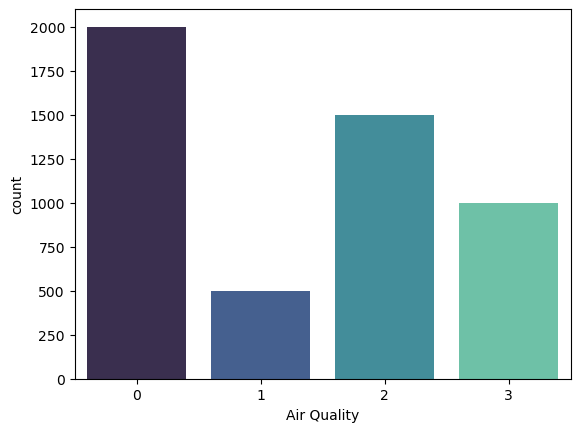

In [96]:
sns.countplot(data=df,x="Air Quality", palette="mako")
plt.show()

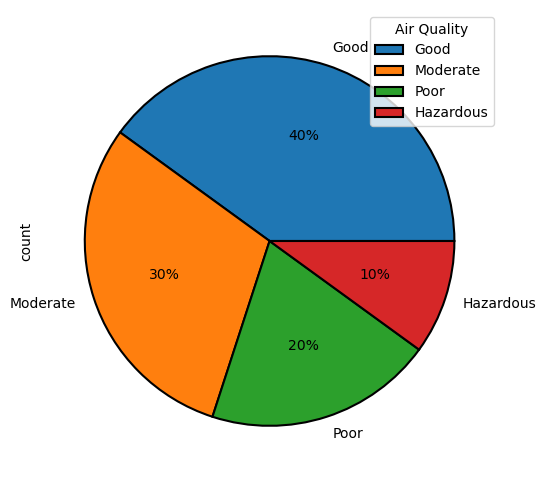

In [16]:
plt.figure(figsize=(8,6))
df["Air Quality"].value_counts().plot(kind="pie",autopct="%.f%%",wedgeprops={"edgecolor":"black","linewidth":1.5})
plt.legend(title="Air Quality",loc="upper right")
plt.show()

In [17]:
feature = df.drop("Air Quality", axis = 1)
feature

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303
...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241


#### ***Skewness Analysis of Features***

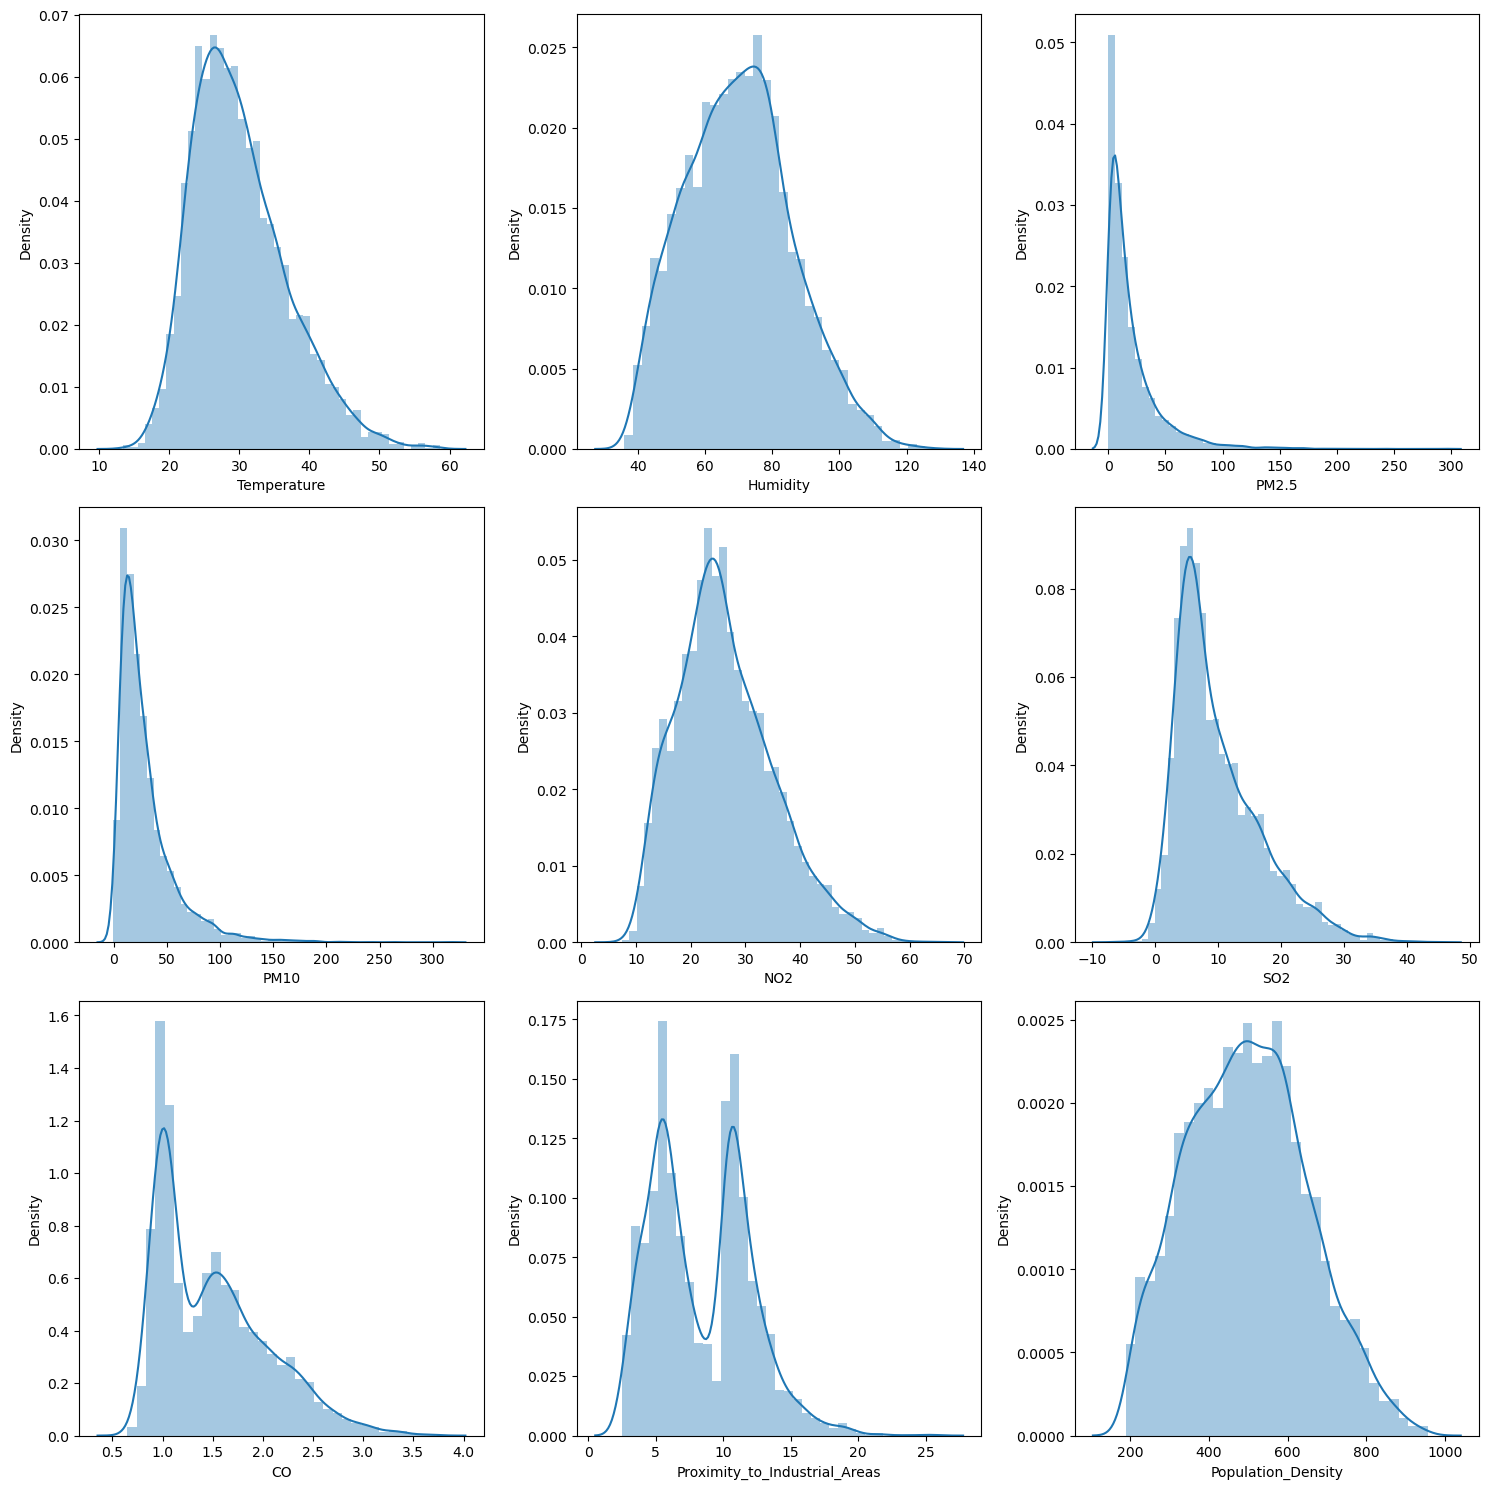

In [19]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Air Quality'):
        sns.distplot(df[col],kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

1. **Temperature**:   The distribution is right-skewed, indicating that the majority of CO levels are concentrated at lower values, with fewer instances of higher concentrations.
     

2. **Humidity**:  The distribution is slightly right-skewed, indicating that higher humidity values are less frequent.
    

3. **PM2.5 (Particulate Matter)**: The distribution is heavily right-skewed, with the majority of values being low, while a few very high PM2.5 values exist.
  
4. **PM10**: Similar to PM2.5, this distribution is heavily right-skewed, reflecting low values for most observations and outliers with high concentrations.
  

5. **NO2 (Nitrogen Dioxide)**: This distribution is slightly right-skewed, with most NO2 values concentrated in the lower range.
      

6. **SO2 (Sulfur Dioxide)**: The distribution is right-skewed, indicating that higher concentrations of SO2 are rare.


7. **CO (Carbon Monoxide)**: The distribution is right-skewed, indicating that the majority of CO levels are concentrated at lower values, with fewer instances of higher concentrations.
  

8. **Proximity to Industrial Areas**: This distribution is bimodal, with two peaks, suggesting two distinct groups of areas – one close and another farther from industrial zones.

    
9. **Population Density**: The distribution is approximately symmetric, leaning slightly to the right. Most population densities are concentrated around the mean.

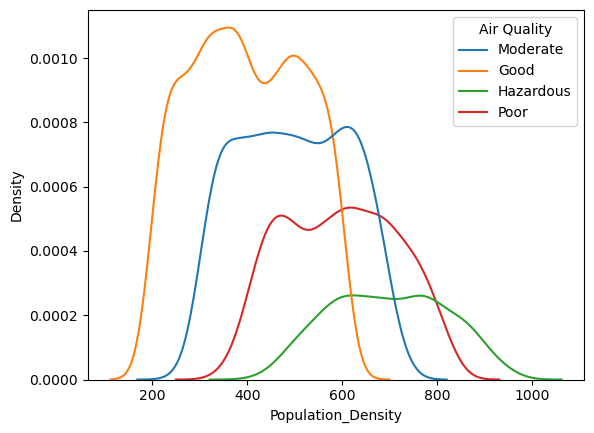

In [21]:
#KDE -- Kerner density Estimation
#check the density/frequency of population density on diff air quality

sns.kdeplot(data=df,x="Population_Density",hue="Air Quality")
plt.show()

#### ***Impact of Industrial accessibility and Population Density on Air Quality***

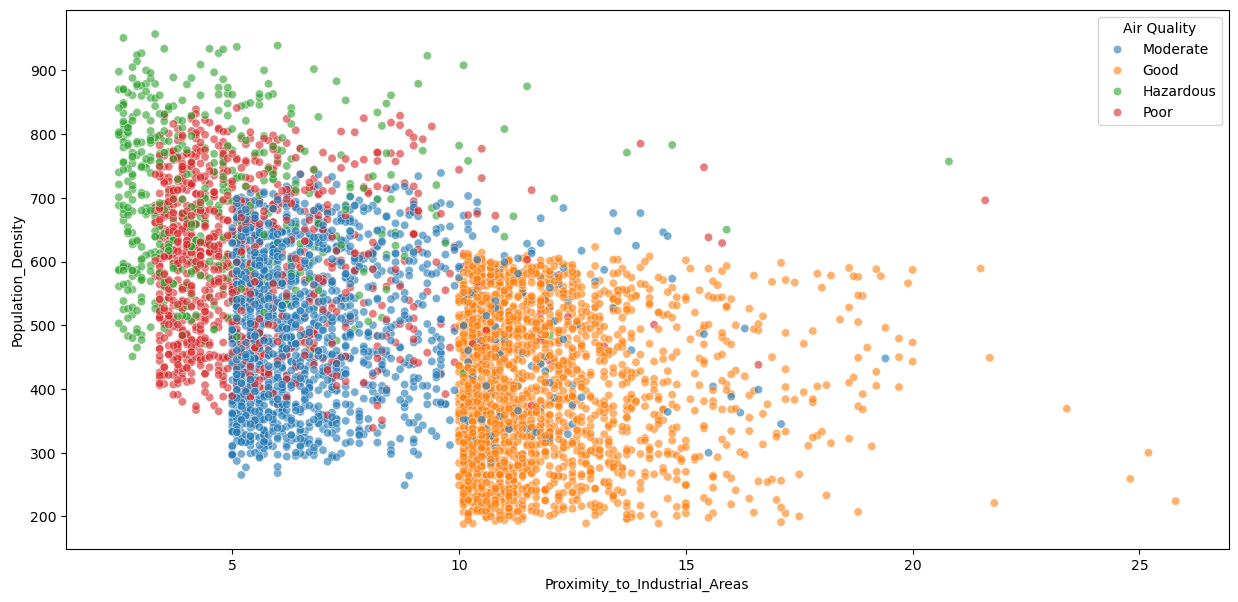

In [23]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='Population_Density',hue='Air Quality',alpha=0.6)
plt.show()

*The above Scatter Plot provides us with clear Explanations:*

- *People living closer to Industrial Areas get decreasing quality of Air Quality*
- *In other words Industrial Areas Proximity is Inversely Proportional to Air Quality*

## ***Preprocessing***
- *Converts the "Air Quality" categorical variable into numeric labels.*
- *Removing duplicates ensures no redundant data points.*

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [27]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [28]:
df.drop_duplicates(keep='first',inplace=True)

In [29]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
df['Air Quality']=le.fit_transform(df['Air Quality'])

In [33]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,0


***Labeling given by label encoder*** 
- ***Good*** : 0
- ***Hazardous*** : 1
- ***Moderate*** : 2
- ***Poor*** : 3

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 371.2 KB


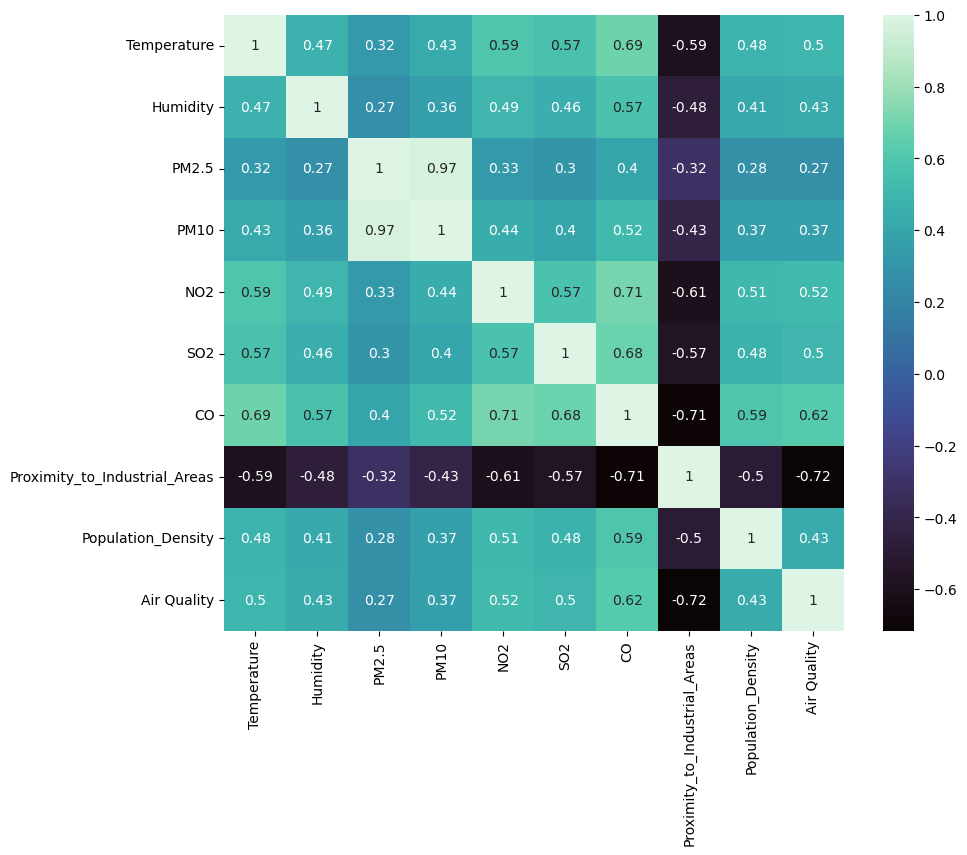

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.show()

## Data Preparation
#### ***Train-Test Split***
Data split into training (70%) and testing (30%) subsets.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x=df.drop('Air Quality', axis=1)
y=df['Air Quality']

In [40]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=1)

### Models used:
- Logistic Regression
- Gradient Boosting Classifier
- Decision Tree Classifier

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 

In [43]:
log = LogisticRegression()
gb = GradientBoostingClassifier(n_estimators=100)
dt = DecisionTreeClassifier()

In [44]:
log.fit(X_train,Y_train)

LogisticRegression()

In [45]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [46]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [47]:
print("Training Score")
print("Logistic Regression:",log.score(X_train,Y_train))
print("Gradient Boosting:",gb.score(X_train,Y_train))
print("Decision tree:",dt.score(X_train, Y_train))

Training Score
Logistic Regression: 0.7525714285714286
Gradient Boosting: 0.9911428571428571
Decision tree: 1.0


In [48]:
print("Testing Score")
print("Logistic Regression:",log.score(X_test,Y_test))
print("Gradient Boosting:",gb.score(X_test,Y_test))
print("Decision tree:",dt.score(X_test,Y_test))

Testing Score
Logistic Regression: 0.7533333333333333
Gradient Boosting: 0.954
Decision tree: 0.924


<p ><i style="color:Purple;"><li>Based on the performance scores, Gradient Boosting stand out as the top-performing models</li><li>
Decision Tree, while accurate on training data, shows signs of overfitting and performs less consistently on test data. Logistic Regression,lags behind in accuracy compared to the other models, making it the least suitable for this task.</li></i></p>

<p ><i style="color:Green;">Gradient Boosting is the best model among all models</i></p>

#### Training Data Prediction

In [52]:
y_predict = gb.predict(X_train)

#### Testing Data Prediction

In [54]:
y_predtest = gb.predict(X_test)

## Evaluation Metrics

In [56]:
print(classification_report(Y_test,y_predtest))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       612
           1       0.92      0.86      0.89       147
           2       0.95      0.96      0.96       448
           3       0.89      0.89      0.89       293

    accuracy                           0.95      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.95      0.95      0.95      1500



Using the classification report, I found that Gradient Boosting had great accuracy was ***95%***, which means the model is reliable and effective for this problem.